In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def weather_graph_pressure():
    df = pd.read_csv('weather.csv')
    df['Date_Time'] = df['Date'] + " " + df['Time']
    df['Date_Time'] = pd.to_datetime(df['Date_Time']).dt.strftime('%d/%m/%y %H:%M:%S')
    q1 = df.shape[0] // 4
    half = df.shape[0] // 2
    q3 = 3 * df.shape[0] // 4
    max_t = df.shape[0]
    time_lbl_str = [str(*df['Date_Time'][:1]),
                    df['Date_Time'][q1],
                    df['Date_Time'][half],
                    df['Date_Time'][q3],
                    str(*df['Date_Time'][-1:])]
    time_lbl_position = [0, q1, half, q3, max_t]
    pres = str(*df['mmHg'][-1:])
    stamp = str(*df['Date_Time'][-1:])
    df.plot(x='Date_Time', y='mmHg',
            figsize=(12, 6), c='g',
            label=f'current pressure {pres} mmHg\n{stamp}, {df.shape[0]} rows', )
    legend = plt.legend()
    plt.setp(legend.get_texts(), color='black', fontsize=10, )
    plt.title(r'$Ambient \ pressure$',fontsize=14, c='w')
    plt.xticks(time_lbl_position, time_lbl_str, color='w', fontsize=10, rotation=0)
    plt.yticks(color='w', fontsize=10)
    plt.xlabel("")
#     plt.xlabel(r'$Time$', fontsize=12, c='w',)
    plt.ylabel(r'$Pressure,\ mmHg$', fontsize=12, c='w')
    plt.grid(axis='both', which='major', color='grey', lw=0.5,)
#     plt.show()
    return plt.show()

In [3]:
# weather_graph_pressure()

In [4]:
def weather_graph_temperature():
    df = pd.read_csv('weather.csv')
    df['Date_Time'] = df['Date'] + " " + df['Time']
    df['Date_Time'] = pd.to_datetime(df['Date_Time']).dt.strftime('%d/%m/%y %H:%M:%S')
    q1 = df.shape[0] // 4
    half = df.shape[0] // 2
    q3 = 3 * df.shape[0] // 4
    max_t = df.shape[0]
    time_lbl_str = [str(*df['Date_Time'][:1]),
                    df['Date_Time'][q1],
                    df['Date_Time'][half],
                    df['Date_Time'][q3],
                    str(*df['Date_Time'][-1:])]
    time_lbl_position = [0, q1, half, q3, max_t]
    temp = str(*df['Temp'][-1:])
    stamp = str(*df['Date_Time'][-1:])
    df.plot(x='Date_Time', y='Temp',
            figsize=(12, 4), c='r',
            label=f'current temperature  {temp} C\n{stamp}, {df.shape[0]} rows', )
    legend = plt.legend()
    plt.setp(legend.get_texts(), color='black', fontsize=10, )
    plt.title(r'$Ambient \ temperature$',fontsize=14, c='w')
    plt.xticks(time_lbl_position, time_lbl_str, color='w', fontsize=10, rotation=0)
    plt.yticks(color='w', fontsize=10)
    plt.xlabel("")
#     plt.xlabel('$Time$', fontsize=12, c='w',)
    plt.ylabel('$Temperature,\ C$', fontsize=12, c='w')
    plt.grid(axis='both', which='major', color='grey', lw=0.5,)
#     plt.show()
    return plt.show()

In [5]:
# weather_graph_temperature()

In [6]:
def weather_graph_humidity():
    df = pd.read_csv('weather.csv')
    df['Date_Time'] = df['Date'] + " " + df['Time'] 
    df['Date_Time'] = pd.to_datetime(df['Date_Time']).dt.strftime('%d/%m/%y %H:%M:%S')
    q1 = df.shape[0] // 4
    half = df.shape[0] // 2
    q3 = 3 * df.shape[0] // 4
    max_t = df.shape[0]
    time_lbl_str = [str(*df['Date_Time'][:1]),
                    df['Date_Time'][q1],
                    df['Date_Time'][half],
                    df['Date_Time'][q3],
                    str(*df['Date_Time'][-1:])]
    time_lbl_position = [0, q1, half, q3, max_t]
    hum = str(*df['Hum'][-1:])
    stamp = str(*df['Date_Time'][-1:])
    df.plot(x='Date_Time', y='Hum',
            figsize=(12, 4), c='blue',
            label=f'current humidity {hum} %\n{stamp}, {df.shape[0]} rows', )
    legend = plt.legend()
    plt.setp(legend.get_texts(), color='black', fontsize=10, )
    plt.title(r'$Ambient \ humidity$',fontsize=14, c='w')
    plt.xticks(time_lbl_position, time_lbl_str, color='w', fontsize=10, rotation=0)
    plt.yticks(color='w', fontsize=10)
#     plt.xlabel(r'$Time$', fontsize=12, c='w',)
    plt.xlabel("")
    plt.ylabel(r'$Humidity,\ \%$', fontsize=12, c='w')
    plt.grid(axis='both', which='major', color='grey', lw=0.5,)
#     plt.show()
    return plt.show()

In [7]:
# weather_graph_humidity()

In [8]:
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import numpy as np
%matplotlib inline


# status of comfortability depends on dew point
def comfort(tdp):
    status = ['Dry', 'Very Comfortable', 'Comfortable', 
          'A Bit Wet', 'Not Comfortable', 'Too Wet', 
              'Strictly Uncomfortable', 'Dangerous']
    tdp = round(tdp)
    if tdp < 10:
        return status[0]
    elif tdp >= 10 and tdp <= 12:
        return status[1]
    elif tdp >= 13 and tdp <= 15:
        return status[2]
    elif tdp >= 16 and tdp <= 17:
        return status[3]
    elif tdp >= 18 and tdp <= 20:
        return status[4]
    elif tdp >= 21 and tdp <= 23:
        return status[5]
    elif tdp >= 21 and tdp <= 23:
        return status[6]
    elif tdp >= 24 and tdp <= 26:
        return status[7]
    else:
        return status[8]

def weather_p_t_h():
    df = pd.read_csv('weather.csv')
    df['Date_Time'] = df['Date'] + " " + df['Time'] 
    df['Date_Time'] = pd.to_datetime(df['Date_Time']).dt.strftime('%d/%m/%y %H:%M:%S')
    df.drop(df.columns[[0, 1, 3, 6]], axis='columns', inplace=True)
    
    # time labels for x-axis
#     q1 = df.shape[0] // 4
#     half = df.shape[0] // 2
#     q3 = 3 * df.shape[0] // 4
#     max_t = df.shape[0]
#     time_lbl_str = [str(*df['Date_Time'][:1]),
#                     df['Date_Time'][q1],
#                     df['Date_Time'][half],
#                     df['Date_Time'][q3],
#                     str(*df['Date_Time'][-1:])]
#     time_lbl_position = [0, q1, half, q3, max_t]

#     pres = str(*df['mmHg'][-1:])
#     temp = str(*df['Temp'][-1:])
#     hum = str(*df['Hum'][-1:])
#     stamp = str(*df['Date_Time'][-1:])
#     left_dt = str(*df['Date_Time'][:1])
    size_initial = df.shape[0]
    time_depth = 1440 * 4
    time_delta = size_initial - time_depth
    df = df[-time_depth:]

    # x-axis values (min, q1, half, q3, max)
    min_t = time_delta
    q1 = (df.shape[0]) // 4 + time_delta
    half = (df.shape[0]) // 2 + time_delta
    q3 = 3 * (df.shape[0]) // 4 + time_delta
    max_t = df.shape[0] + time_delta
    # print(min_t, max_t, str(*df['Date_Time'][:1]), str(*df['Date_Time'][-1:]))
    time_lbl_str = [str(*df['Date_Time'][:1]),
                    df['Date_Time'][q1],
                    df['Date_Time'][half],
                    df['Date_Time'][q3],
                    str(*df['Date_Time'][-1:])]
    time_lbl_position = [min_t, q1, half, q3, max_t]
    
    #dew point temperature   
    Tdp = np.array([])
    beta = np.log10(df['Hum']) + (7.45 * df['Temp'] /(235 + df['Temp'])) - 2
    Tdp =  round((235 * beta) / (7.45 - beta),2)

    # last values and date time stamp of last measurement
    pres = str(*df['mmHg'][-1:])
    temp = str(*df['Temp'][-1:])
    hum = str(*df['Hum'][-1:])
    stamp = str(*df['Date_Time'][-1:])
    left_dt = str(*df['Date_Time'][:1])
    tdp = str(*Tdp[-1:])

#     plt.style.use('dark_background')
    fig = plt.figure(figsize=(12, 8))
    # Сетка состоит из 4 строк и 1 столбца. Первая ячейка имеет номер (0,0),
    # а последняя - (3,0)
    egrid = (4,1)

    ax3 = plt.subplot2grid(egrid, (3, 0), ) # для влажности
    ax1 = plt.subplot2grid(egrid, (0, 0), rowspan=2, sharex=ax3) # для давления
    ax2 = plt.subplot2grid(egrid, (2, 0), sharex=ax3 ) # для температуры
    
    ax1.plot(df['mmHg'], c='g')
    ax2.plot(df['Temp'], c='r', label=f'$Temperature$\n{temp} $C$')
    ax2.plot(Tdp, c='deepskyblue', label=f'$Dew\ Point$\n{tdp} $C$\n{comfort(*Tdp[-1:])}')
    ax3.plot(df['Hum'], c='b')

#     ax1.set_title(f'{left_dt} - {stamp}', c='w', fontsize=14)
#     ax1.set_title(f'{left_dt} - {stamp}\n$Ambient\ Pressure$', c='w', fontsize=14)
#     ax2.set_title(f'$Ambient\ Temperature$', c='w',fontsize=14)
#     ax3.set_title(f'$Ambient\ Humidity$', c='w', fontsize=14)

    ax1.tick_params(axis='x', which='major', labelbottom='')
    ax2.tick_params(axis='x', which='major', labelbottom='')
    ax3.tick_params(axis='x', which='major', labelbottom='on')

    ax1.tick_params(axis='y', which='major', labelcolor='k')
    ax2.tick_params(axis='y', which='major', labelcolor='k')
    ax3.tick_params(axis='y', which='major', labelcolor='k')

    ax1.set_ylabel('$Pressure,\ mmHg$', c='k', fontsize=12)
    ax2.set_ylabel('$Temperature,\ C$', c='k', fontsize=12)
    ax3.set_ylabel('$Humidity,\ \%$', c='k', fontsize=12)
    
    ax1.legend([f'$Pressure$\n{pres} $mmHg$'], loc='upper left', fontsize=24)
#     ax2.legend([f'$Temperature$\n{temp} $C$\n$Dew\ Point\ Temp$\n{tdp} $C$'], loc='upper left', fontsize=12)
    ax3.legend([f'$Humidity$\n{hum} $\%$'], loc='upper left', fontsize=12)

    ax2.legend(loc='upper left', fontsize=12)
    
    ax3.set_xticks(time_lbl_position)
    ax3.set_xticklabels(time_lbl_str, fontsize=10, color='k')
    # Настройка расстояний между границами созданных subplots
    plt.tight_layout(h_pad = 0)
    # сетка на графиках
    for ax in fig.axes:
        ax.grid(True)
    # plt.grid(True)
    return plt.show()

In [9]:
# weather_p_t_h()

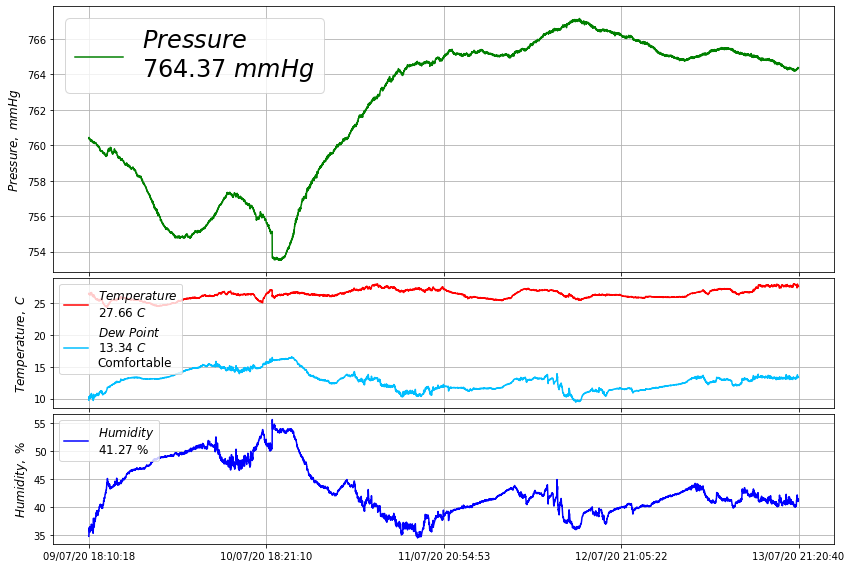

In [ ]:
import os
from IPython.display import clear_output

df = pd.read_csv(r'C:\Users\user\weather.csv')
file_size = os.path.getsize('weather.csv') 
# print(df.shape[0], file_size)# print("*" * 20)
# c = 0
while True:
    if file_size != os.path.getsize(r'C:\Users\user\weather.csv'): 
#         df = pd.read_csv('weather.csv')
#         print(df.shape[0], os.path.getsize('weather.csv') )
#         os.system('cls')
        clear_output()
#         weather_graph_pressure()
#         weather_graph_temperature()
#         weather_graph_humidity()
        weather_p_t_h()
        file_size = os.path.getsize(r'C:\Users\user\weather.csv') 
#         c +=1
    

не дописано:  
- нет проверки от ошибочных данных  
- нет проверки от неполных данных  
- нет проверки после перезапуска
- нет проверки от скачков данных  


not completed yet:
 - check for error data  
 - check for complete data receiving  
 - check after reset/reboot  
 - check for data 'jumps'
 
вставить данные по точкам росы:

Точка росы, °C  Восприятие человеком  
более 26	  крайне высокое восприятие,   смертельно опасно для больных астмой  
24—26	крайне некомфортное состояние	
21—23	очень влажно и некомфортно  
18—20	неприятно воспринимается большинством людей	 
16—17	комфортно для большинства, но ощущается верхний предел влажности	  
13—15	комфортно  
10—12	очень комфортно  
менее 10	немного сухо для некоторых
